In [1]:
!pip install squarify
!pip install streamlit
import os   #For operating system related functionalities
from collections import defaultdict #For creating a dictionary with a default value
import streamlit as st
import zipfile
import pandas as pd
import re
import numpy as np
import string
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
zip_file_path = r'C:\Users\Sanjeev Mishra\Downloads\Resumes-20220812T140008Z-001 (1).zip'
#raw string literals, which is used to prevent any escape character interpretation.
extract_path = r'/content/Resumes'

# Extract the ZIP file to the specified extract path
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Dictionary to store the count of file extensions
file_extension_count = defaultdict(int)

# Iterate over the files in the extracted directory
for root, dirs, files in os.walk(extract_path):
    for file in files:
        file_extension = os.path.splitext(file)[1]
        file_extension_count[file_extension] += 1

# Print the count of each file extension
for extension, count in file_extension_count.items():
    print(f"File extension: {extension}, Count: {count}")

# Calculate the total count of file extensions
total_count = sum(file_extension_count.values())

# Print the total count
print("Total count:", total_count)

File extension: .docx, Count: 52
File extension: .doc, Count: 26
File extension: .pdf, Count: 1
Total count: 79


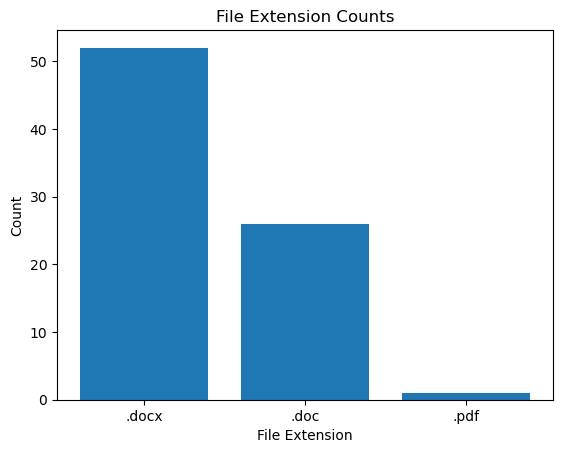

In [3]:
import matplotlib.pyplot as plt

# Get the file extensions and their corresponding counts
extensions = ['.docx', '.doc', '.pdf']
counts = [file_extension_count[extension] for extension in extensions]

# Plotting the bar plot
plt.bar(extensions, counts)
plt.xlabel('File Extension')
plt.ylabel('Count')

plt.title('File Extension Counts')
plt.show()

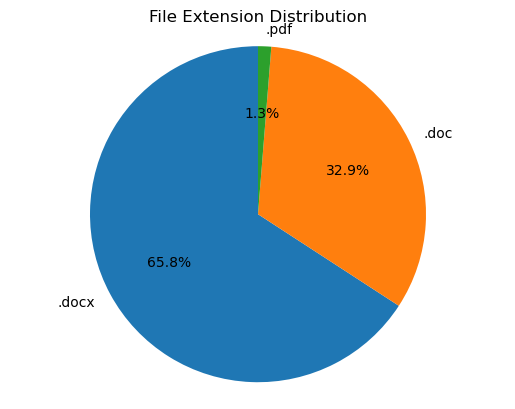

In [4]:
import matplotlib.pyplot as plt

# Get the file extensions and their corresponding counts
extensions = ['.docx', '.doc', '.pdf']
counts = [file_extension_count[extension] for extension in extensions]

# Define labels for the pie chart
labels = extensions

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Set the title of the pie chart
plt.title('File Extension Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

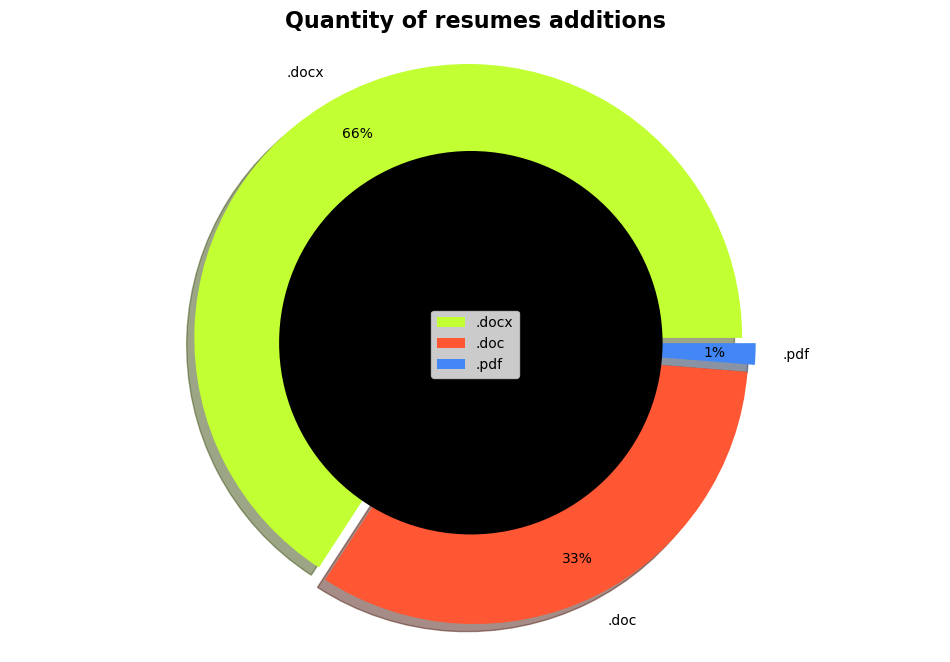

In [5]:
import matplotlib.pyplot as plt

sizes = [file_extension_count['.docx'], file_extension_count['.doc'], file_extension_count['.pdf']]
labels = ['.docx', '.doc', '.pdf']
colors = ['#c2ff33', '#ff5733', '#4287f5']
explode = (0.02, 0.03, 0.04)

plt.figure(figsize=(12, 8), dpi=100)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, pctdistance=0.85, explode=explode)
plt.title('Quantity of resumes additions', fontsize=16, fontweight='bold')

centre_circle = plt.Circle((0, 0), 0.70, fc='black')
plt.gca().add_artist(centre_circle)

plt.legend(labels, loc='center')
plt.axis('equal')
plt.show()

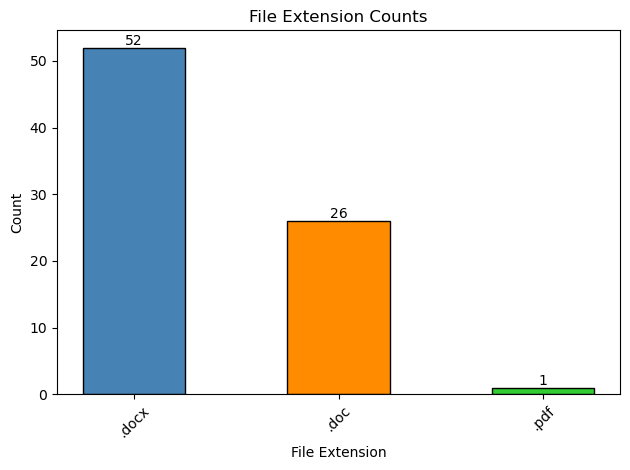

In [6]:
import matplotlib.pyplot as plt

extensions = ['.docx', '.doc', '.pdf']
counts = [file_extension_count[extension] for extension in extensions]
colors = ['steelblue', 'darkorange', 'limegreen']

plt.bar(extensions, counts, color=colors, width=0.5, edgecolor='black')
plt.xlabel('File Extension')
plt.ylabel('Count')
plt.title('File Extension Counts')
plt.xticks(rotation=45)

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [7]:
os.listdir('Resumes/Resumes')

['Peoplesoft', 'R_developer', 'SQL_Developer', 'Workday']

In [8]:
import os
import pandas as pd

extract_folder = r'C:\Users\Sanjeev Mishra\Downloads\Resumes'

file_name = []
profile = []

for root, dirs, files in os.walk(extract_folder):
    for file in files:
        if file.endswith('.docx') or file.endswith('.doc') or file.endswith('.pdf'):
            parent_folder = os.path.basename(os.path.dirname(root))
            if parent_folder == "Resumes":
                parent_folder = os.path.basename(root)
            profile.append(parent_folder)
            file_name.append(file)

# Create the DataFrame
data = pd.DataFrame()
data['Resume'] = file_name
data['Profile'] = profile

# Print the DataFrame
print(data)


                                    Resume     Profile
0       Peoplesoft Admin_AnubhavSingh.docx  Peoplesoft
1     Peoplesoft Admin_G Ananda Rayudu.doc  Peoplesoft
2          Peoplesoft Admin_Gangareddy.doc  Peoplesoft
3             Peoplesoft Admin_Murali.docx  Peoplesoft
4   Peoplesoft Admin_Priyanka Ramadoss.doc  Peoplesoft
..                                     ...         ...
74              Sri Krishna S_Hexaware.doc     Workday
75                  Srikanth-Hexaware.docx     Workday
76                   SSKumar_Hexaware.docx     Workday
77            Venkateswarlu B_Hexaware.doc     Workday
78               Vinay Kumar_Hexaware.docx     Workday

[79 rows x 2 columns]


###**Save the .Csv File**

In [9]:
import pandas as pd
# Specify the file path and name where we need to save the CSV file
file_path = '/content/data.csv'
# Save the DataFrame as a CSV file
data.to_csv(file_path, index=False)

In [10]:
# Read the CSV file and create a DataFrame
df = pd.read_csv(file_path)
# Now work with the DataFrame
print(df)

                                    Resume     Profile
0       Peoplesoft Admin_AnubhavSingh.docx  Peoplesoft
1     Peoplesoft Admin_G Ananda Rayudu.doc  Peoplesoft
2          Peoplesoft Admin_Gangareddy.doc  Peoplesoft
3             Peoplesoft Admin_Murali.docx  Peoplesoft
4   Peoplesoft Admin_Priyanka Ramadoss.doc  Peoplesoft
..                                     ...         ...
74              Sri Krishna S_Hexaware.doc     Workday
75                  Srikanth-Hexaware.docx     Workday
76                   SSKumar_Hexaware.docx     Workday
77            Venkateswarlu B_Hexaware.doc     Workday
78               Vinay Kumar_Hexaware.docx     Workday

[79 rows x 2 columns]


In [11]:
df[df.Profile == 'R_developer']

,Resume,Profile
20,Internship_Ravali_Musquare Technologies (1).docx,R_developer
21,Internship_Susovan Bag_Musquare Technologies.docx,R_developer
22,React Developer_Deepakreddy.docx,R_developer
23,React Developer_Haripriya.docx,R_developer
24,React Developer_Kamalakar Reddy.docx,R_developer
25,React Developer_Naveen sadhu.docx,R_developer
26,React Developer_PavasGoswami.doc,R_developer
27,React Developer_Pragnya.docx,R_developer
28,React Developer_Sarala Madasu-converted.docx,R_developer
29,React Developer_Thirupathiamma.docx,R_developer


In [12]:
df[df.Profile == 'Peoplesoft']

,Resume,Profile
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft
1,Peoplesoft Admin_G Ananda Rayudu.doc,Peoplesoft
2,Peoplesoft Admin_Gangareddy.doc,Peoplesoft
3,Peoplesoft Admin_Murali.docx,Peoplesoft
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Peoplesoft
5,Peoplesoft Admin_SirazuddinMohammad.docx,Peoplesoft
6,Peoplesoft Admin_srinivasarao.doc,Peoplesoft
7,Peoplesoft Admin_Varkala Vikas.docx,Peoplesoft
8,Peoplesoft Admin_Vinod Akkala.doc,Peoplesoft
9,PeopleSoft DBA_Ganesh Alladi.doc,Peoplesoft


In [13]:
df[df.Profile == 'Workday']

,Resume,Profile
58,ChinnaSubbarayuduM_Hexaware.docx,Workday
59,Gopi Krishna_Hexaware.docx,Workday
60,Hari Krishna M_Hexaware.doc,Workday
61,Harikrishna Akula_Hexaware.doc,Workday
62,Hima Mendu_Hexaware.doc,Workday
63,Himaja G_(Hexaware).docx,Workday
64,J. Sumanth Royal_Hexaware.doc,Workday
65,Jyotiverma_Heaware.docx,Workday
66,Madeeswar A_Hexaware.doc,Workday
67,MooraboyinaGuravaiah_Hexaware.docx,Workday


In [14]:
df[df.Profile == 'SQL_Developer']

,Resume,Profile
44,Anil kumar.docx,SQL_Developer
45,AradhanaTripathi[4_0].docx,SQL_Developer
46,Buddha Vamsi.docx,SQL_Developer
47,kamballapradeep.docx,SQL_Developer
48,Nazeer Basha.doc,SQL_Developer
49,Neeraj Mishra.docx,SQL_Developer
50,premsai.docx,SQL_Developer
51,Priyanka L.doc,SQL_Developer
52,PSyamKumar[2_3].docx,SQL_Developer
53,Rajupavanakumari[2_10].docx,SQL_Developer


##Data Inspection:

###**Data Structure:**

In [15]:
len(df)

79

In [16]:
df.shape

(79, 2)

###**Data Dimension:**

In [17]:
df.ndim

2

###**Data Types:**

In [18]:
df.dtypes

Resume     object
Profile    object
dtype: object

###**Checking Missing Values:**

In [19]:
df.isnull().sum()

Resume     0
Profile    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Resume   79 non-null     object
 1   Profile  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [21]:
df.Profile.value_counts()

R_developer      24
Workday          21
Peoplesoft       20
SQL_Developer    14
Name: Profile, dtype: int64

##**Data Visualization:**

###**Count Plot:**

<Axes: xlabel='count', ylabel='Profile'>

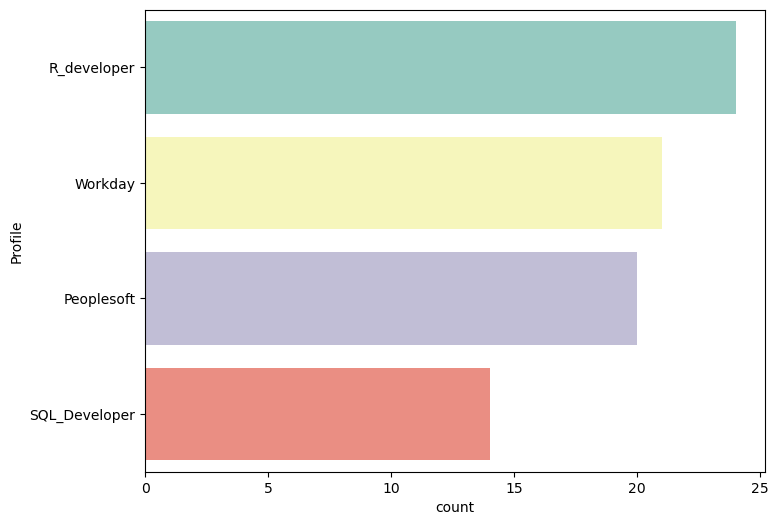

In [22]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(y="Profile" , palette="Set3", data=df, order = df['Profile'].value_counts().index)

###**Histogram:**

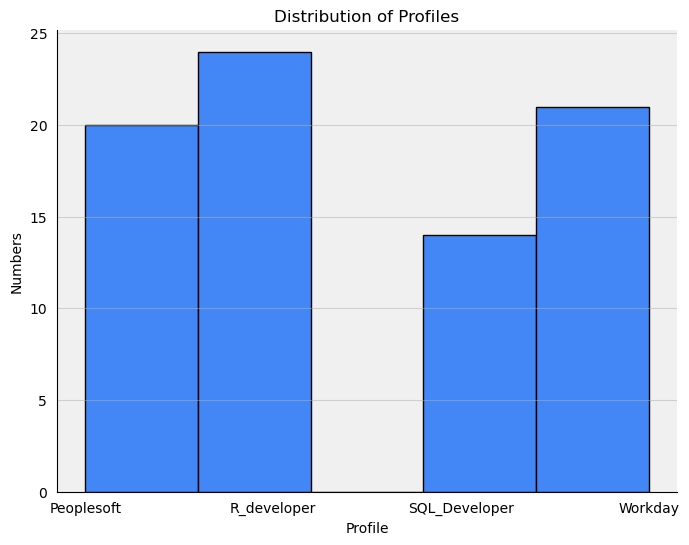

In [23]:
# Create a histogram
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
plt.hist(df['Profile'], bins=5, edgecolor='black', color='#4287f5')  # Customize the color of the bars

# Add labels and title
plt.xlabel('Profile')
plt.ylabel('Numbers')
plt.title('Distribution of Profiles')

# Add grid lines
plt.grid(axis='y', alpha=0.5)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a light background color
plt.gca().set_facecolor('#f0f0f0')

# Adjust tick parameters
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Display the histogram
plt.show()

###**Scatter plot:**

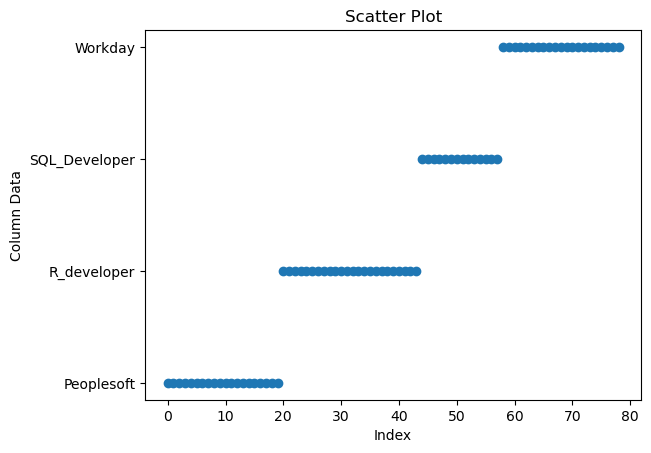

In [24]:
# Create a scatter plot
plt.scatter(df.index, data.Profile)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Column Data')
plt.title('Scatter Plot')

# Display the scatter plot
plt.show()

##**Network Graph**

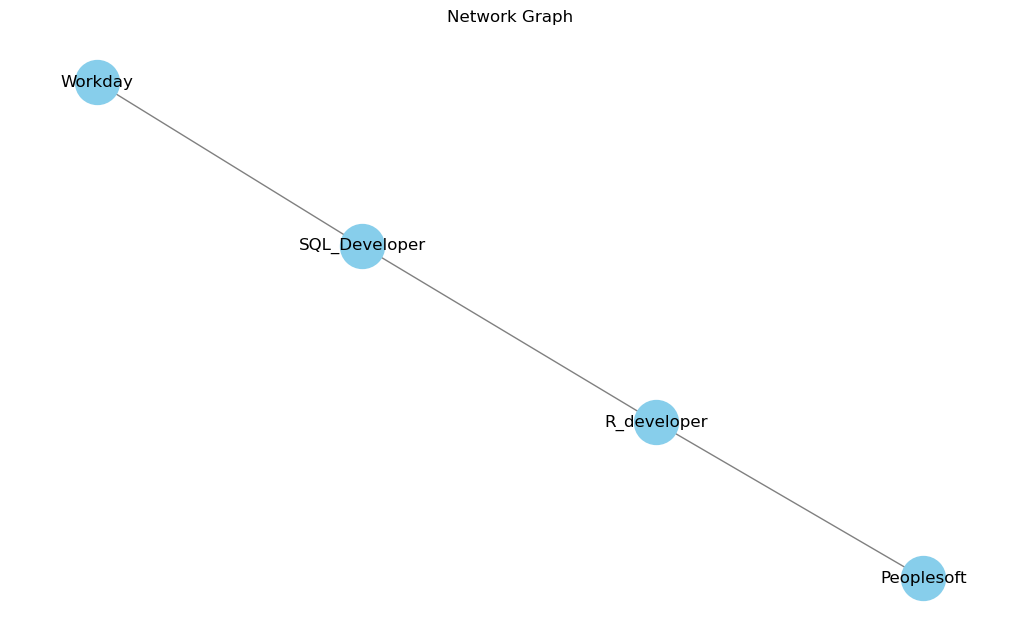

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with a column 'column_name'
column_data = df['Profile']

# Create an empty graph
G = nx.Graph()

# Add nodes
nodes = column_data.unique()
G.add_nodes_from(nodes)

# Add edges
edges = [(nodes[i], nodes[i+1]) for i in range(len(nodes)-1)]
G.add_edges_from(edges)

# Draw the network graph
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.title('Network Graph')
plt.show()

###**Tree Map**

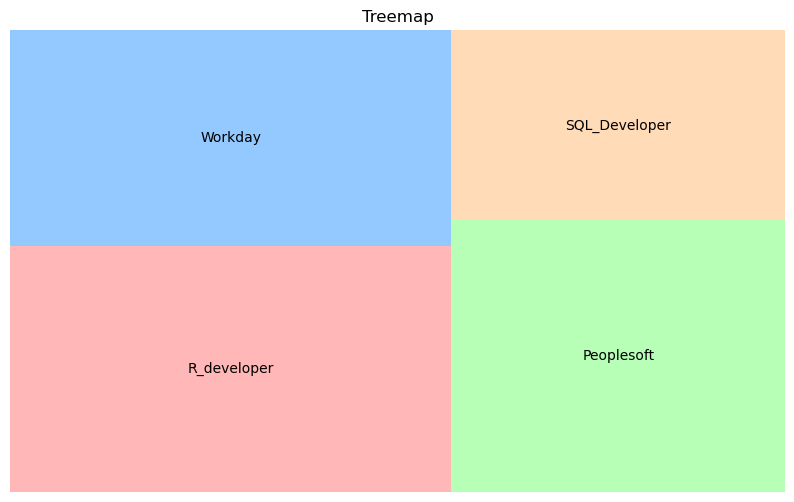

In [26]:
# Assuming you have a DataFrame named 'data' with a column 'column1'
column1 = df['Profile']

# Calculate the proportions of each value in the column
value_counts = column1.value_counts(normalize=True)

# Assign colors to the values
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Create the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=value_counts, label=value_counts.index, color=colors, alpha=0.7)

# Add labels and title
plt.axis('off')
plt.title('Treemap')

# Display the treemap
plt.show()

##**Histogram**

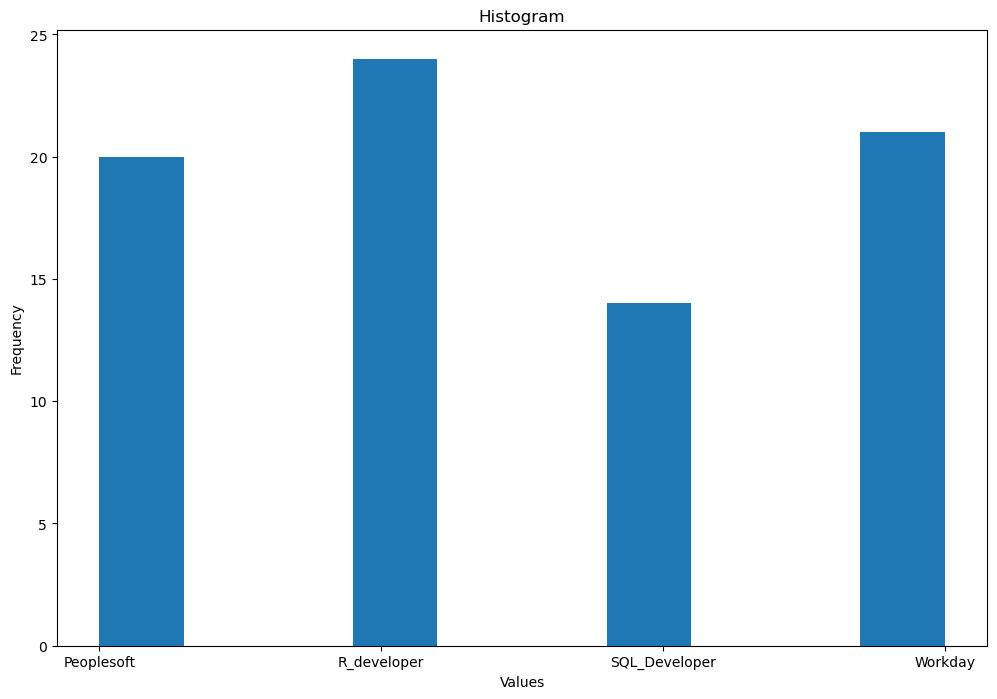

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with a column 'column1'
column1 = data['Profile']

# Create a histogram
plt.figure(figsize=(12,8))
plt.hist(column1, bins=10)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the histogram
plt.show()

##**Heat Map**

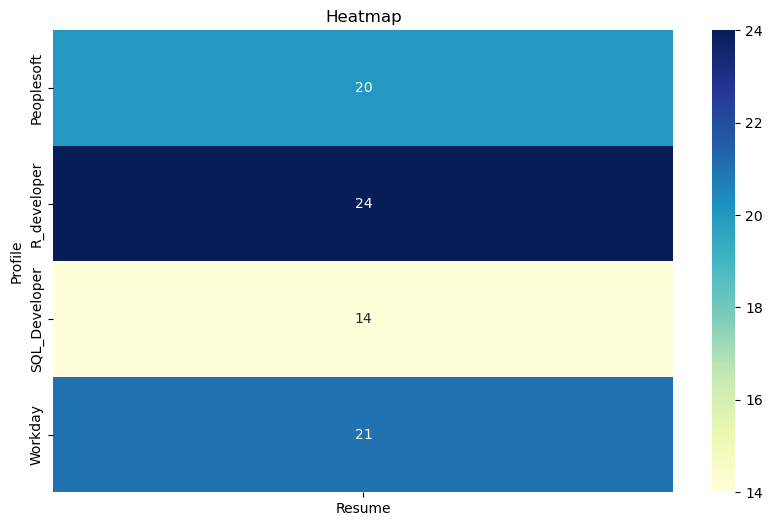

In [28]:
# Assuming you have a DataFrame named 'data' with two columns 'column1' and 'column2'
column1 = 'Profile'  # Replace with the actual column name
column2 = 'Resume'  # Replace with the actual column name

# Create a pivot table with the two columns
pivot_table = pd.pivot_table(df, values=column2, index=column1, aggfunc='count')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')

# Add title
plt.title('Heatmap')

# Display the heatmap
plt.show()

###**Count Number of Words**

In [29]:
# Count the number of words in the "Resume" column
df['word_count'] = df['Resume'].str.split().apply(len)
# Print the resulting DataFrame
print(df)

                                    Resume     Profile  word_count
0       Peoplesoft Admin_AnubhavSingh.docx  Peoplesoft           2
1     Peoplesoft Admin_G Ananda Rayudu.doc  Peoplesoft           4
2          Peoplesoft Admin_Gangareddy.doc  Peoplesoft           2
3             Peoplesoft Admin_Murali.docx  Peoplesoft           2
4   Peoplesoft Admin_Priyanka Ramadoss.doc  Peoplesoft           3
..                                     ...         ...         ...
74              Sri Krishna S_Hexaware.doc     Workday           3
75                  Srikanth-Hexaware.docx     Workday           1
76                   SSKumar_Hexaware.docx     Workday           1
77            Venkateswarlu B_Hexaware.doc     Workday           2
78               Vinay Kumar_Hexaware.docx     Workday           2

[79 rows x 3 columns]


###**Count Number of Characters**

In [30]:
# Count the number of characters in the "Resume" column
df['char_count'] = df['Resume'].str.len()
# Print the "Resume" and "char_count" columns
print(df[['Resume', 'char_count']])

                                    Resume  char_count
0       Peoplesoft Admin_AnubhavSingh.docx          34
1     Peoplesoft Admin_G Ananda Rayudu.doc          36
2          Peoplesoft Admin_Gangareddy.doc          31
3             Peoplesoft Admin_Murali.docx          28
4   Peoplesoft Admin_Priyanka Ramadoss.doc          38
..                                     ...         ...
74              Sri Krishna S_Hexaware.doc          26
75                  Srikanth-Hexaware.docx          22
76                   SSKumar_Hexaware.docx          21
77            Venkateswarlu B_Hexaware.doc          28
78               Vinay Kumar_Hexaware.docx          25

[79 rows x 2 columns]


###**Count Numbers**

In [31]:
def count_numbers(text):
    return sum(char.isdigit() for char in str(text))
# Apply the counting function to the "Resume" column
df['num_numbers'] = df['Resume'].apply(count_numbers)
print(df[['Resume', 'num_numbers']].head(32))

                                               Resume  num_numbers
0                  Peoplesoft Admin_AnubhavSingh.docx            0
1                Peoplesoft Admin_G Ananda Rayudu.doc            0
2                     Peoplesoft Admin_Gangareddy.doc            0
3                        Peoplesoft Admin_Murali.docx            0
4              Peoplesoft Admin_Priyanka Ramadoss.doc            0
5            Peoplesoft Admin_SirazuddinMohammad.docx            0
6                   Peoplesoft Admin_srinivasarao.doc            0
7                 Peoplesoft Admin_Varkala Vikas.docx            0
8                   Peoplesoft Admin_Vinod Akkala.doc            0
9                    PeopleSoft DBA_Ganesh Alladi.doc            0
10              PeopleSoft DBA_Vivekanand Sayana.docx            0
11                   Peoplesoft Finance_Arun Venu.doc            0
12               Peoplesoft Finance_Pritam Biswas.doc            0
13                 Peoplesoft Finance_Rahul Ahuja.doc         

In [32]:
df.head(20)

,Resume,Profile,word_count,char_count,num_numbers
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft,2,34,0
1,Peoplesoft Admin_G Ananda Rayudu.doc,Peoplesoft,4,36,0
2,Peoplesoft Admin_Gangareddy.doc,Peoplesoft,2,31,0
3,Peoplesoft Admin_Murali.docx,Peoplesoft,2,28,0
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Peoplesoft,3,38,0
5,Peoplesoft Admin_SirazuddinMohammad.docx,Peoplesoft,2,40,0
6,Peoplesoft Admin_srinivasarao.doc,Peoplesoft,2,33,0
7,Peoplesoft Admin_Varkala Vikas.docx,Peoplesoft,3,35,0
8,Peoplesoft Admin_Vinod Akkala.doc,Peoplesoft,3,33,0
9,PeopleSoft DBA_Ganesh Alladi.doc,Peoplesoft,3,32,0


In [33]:
df = df.drop(["word_count", "char_count", "num_numbers"], axis=1)

In [34]:
df.head(19)

,Resume,Profile
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft
1,Peoplesoft Admin_G Ananda Rayudu.doc,Peoplesoft
2,Peoplesoft Admin_Gangareddy.doc,Peoplesoft
3,Peoplesoft Admin_Murali.docx,Peoplesoft
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Peoplesoft
5,Peoplesoft Admin_SirazuddinMohammad.docx,Peoplesoft
6,Peoplesoft Admin_srinivasarao.doc,Peoplesoft
7,Peoplesoft Admin_Varkala Vikas.docx,Peoplesoft
8,Peoplesoft Admin_Vinod Akkala.doc,Peoplesoft
9,PeopleSoft DBA_Ganesh Alladi.doc,Peoplesoft


###**Cleaning & Preprocessing of data**

In [35]:
import re
def remove_numbers(text):
    # Remove special characters,digits & Numbers
    text = re.sub(r"[^a-zA-Z\s]_()", " ", text)
    # Remove numbers using regular expression
    text = re.sub(r'\d+', '', text)
    return text

df['Resume'] = df['Resume'].apply(remove_numbers)
df.head(12)

,Resume,Profile
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft
1,Peoplesoft Admin_G Ananda Rayudu.doc,Peoplesoft
2,Peoplesoft Admin_Gangareddy.doc,Peoplesoft
3,Peoplesoft Admin_Murali.docx,Peoplesoft
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Peoplesoft
5,Peoplesoft Admin_SirazuddinMohammad.docx,Peoplesoft
6,Peoplesoft Admin_srinivasarao.doc,Peoplesoft
7,Peoplesoft Admin_Varkala Vikas.docx,Peoplesoft
8,Peoplesoft Admin_Vinod Akkala.doc,Peoplesoft
9,PeopleSoft DBA_Ganesh Alladi.doc,Peoplesoft


In [36]:
resume_paragraph = '\n'.join(df['Resume'])
print(resume_paragraph)

Peoplesoft Admin_AnubhavSingh.docx
Peoplesoft Admin_G Ananda Rayudu.doc
Peoplesoft Admin_Gangareddy.doc
Peoplesoft Admin_Murali.docx
Peoplesoft Admin_Priyanka Ramadoss.doc
Peoplesoft Admin_SirazuddinMohammad.docx
Peoplesoft Admin_srinivasarao.doc
Peoplesoft Admin_Varkala Vikas.docx
Peoplesoft Admin_Vinod Akkala.doc
PeopleSoft DBA_Ganesh Alladi.doc
PeopleSoft DBA_Vivekanand Sayana.docx
Peoplesoft Finance_Arun Venu.doc
Peoplesoft Finance_Pritam Biswas.doc
Peoplesoft Finance_Rahul Ahuja.doc
Peoplesoft FSCM_HariNarayana.docx
Peoplesoft FSCM_Murali.docx
Peoplesoft FSCM_PriyabrataHota.docx
Peoplesoft FSCM_R Ahmed.doc
Peoplesoft FSCM_SUJATHA.docx
Resume_Subha Santosh_Peoplesoft FSCM.docx
Internship_Ravali_Musquare Technologies ().docx
Internship_Susovan Bag_Musquare Technologies.docx
React Developer_Deepakreddy.docx
React Developer_Haripriya.docx
React Developer_Kamalakar Reddy.docx
React Developer_Naveen sadhu.docx
React Developer_PavasGoswami.doc
React Developer_Pragnya.docx
React Developer

In [37]:
import textwrap
#To display the paragraph with line breaks in a readable format
joined_text = ' '.join(df['Resume'].tolist())
paragraph = "\n\n".join([line.strip() for line in joined_text.split("\n") if line.strip()])

# Wrap the paragraph with a specific width
wrapped_paragraph = textwrap.fill(paragraph, width=80)

# Print the wrapped paragraph
print(wrapped_paragraph)

Peoplesoft Admin_AnubhavSingh.docx Peoplesoft Admin_G Ananda Rayudu.doc
Peoplesoft Admin_Gangareddy.doc Peoplesoft Admin_Murali.docx Peoplesoft
Admin_Priyanka Ramadoss.doc Peoplesoft Admin_SirazuddinMohammad.docx Peoplesoft
Admin_srinivasarao.doc Peoplesoft Admin_Varkala Vikas.docx Peoplesoft
Admin_Vinod Akkala.doc PeopleSoft DBA_Ganesh Alladi.doc PeopleSoft
DBA_Vivekanand Sayana.docx Peoplesoft Finance_Arun Venu.doc Peoplesoft
Finance_Pritam Biswas.doc Peoplesoft Finance_Rahul Ahuja.doc Peoplesoft
FSCM_HariNarayana.docx Peoplesoft FSCM_Murali.docx Peoplesoft
FSCM_PriyabrataHota.docx Peoplesoft FSCM_R Ahmed.doc Peoplesoft
FSCM_SUJATHA.docx Resume_Subha Santosh_Peoplesoft FSCM.docx
Internship_Ravali_Musquare Technologies ().docx Internship_Susovan Bag_Musquare
Technologies.docx React Developer_Deepakreddy.docx React
Developer_Haripriya.docx React Developer_Kamalakar Reddy.docx React
Developer_Naveen sadhu.docx React Developer_PavasGoswami.doc React
Developer_Pragnya.docx React Developer

In [38]:
#Punctuation
no_punc_text = wrapped_paragraph.translate(str.maketrans("", "", string.punctuation))
no_punc_text

'Peoplesoft AdminAnubhavSinghdocx Peoplesoft AdminG Ananda Rayududoc\nPeoplesoft AdminGangareddydoc Peoplesoft AdminMuralidocx Peoplesoft\nAdminPriyanka Ramadossdoc Peoplesoft AdminSirazuddinMohammaddocx Peoplesoft\nAdminsrinivasaraodoc Peoplesoft AdminVarkala Vikasdocx Peoplesoft\nAdminVinod Akkaladoc PeopleSoft DBAGanesh Alladidoc PeopleSoft\nDBAVivekanand Sayanadocx Peoplesoft FinanceArun Venudoc Peoplesoft\nFinancePritam Biswasdoc Peoplesoft FinanceRahul Ahujadoc Peoplesoft\nFSCMHariNarayanadocx Peoplesoft FSCMMuralidocx Peoplesoft\nFSCMPriyabrataHotadocx Peoplesoft FSCMR Ahmeddoc Peoplesoft\nFSCMSUJATHAdocx ResumeSubha SantoshPeoplesoft FSCMdocx\nInternshipRavaliMusquare Technologies docx InternshipSusovan BagMusquare\nTechnologiesdocx React DeveloperDeepakreddydocx React\nDeveloperHaripriyadocx React DeveloperKamalakar Reddydocx React\nDeveloperNaveen sadhudocx React DeveloperPavasGoswamidoc React\nDeveloperPragnyadocx React DeveloperSarala Madasuconverteddocx React\nDeveloperThi

In [39]:
# Normalize the data and convert to lowercase
lower_words = [word.lower() for word in no_punc_text.split()]
print(lower_words[0:35])

['peoplesoft', 'adminanubhavsinghdocx', 'peoplesoft', 'adming', 'ananda', 'rayududoc', 'peoplesoft', 'admingangareddydoc', 'peoplesoft', 'adminmuralidocx', 'peoplesoft', 'adminpriyanka', 'ramadossdoc', 'peoplesoft', 'adminsirazuddinmohammaddocx', 'peoplesoft', 'adminsrinivasaraodoc', 'peoplesoft', 'adminvarkala', 'vikasdocx', 'peoplesoft', 'adminvinod', 'akkaladoc', 'peoplesoft', 'dbaganesh', 'alladidoc', 'peoplesoft', 'dbavivekanand', 'sayanadocx', 'peoplesoft', 'financearun', 'venudoc', 'peoplesoft', 'financepritam', 'biswasdoc']


In [40]:
len(no_punc_text)

2455

## **Feature Extraction**

###**CountVectorizer**

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Resume'])

In [42]:
print(vectorizer.vocabulary_)

{'peoplesoft': 96, 'admin_anubhavsingh': 3, 'docx': 53, 'admin_g': 4, 'ananda': 17, 'rayudu': 108, 'doc': 52, 'admin_gangareddy': 5, 'admin_murali': 6, 'admin_priyanka': 7, 'ramadoss': 103, 'admin_sirazuddinmohammad': 8, 'admin_srinivasarao': 9, 'admin_varkala': 10, 'vikas': 133, 'admin_vinod': 11, 'akkala': 14, 'dba_ganesh': 30, 'alladi': 16, 'dba_vivekanand': 31, 'sayana': 118, 'finance_arun': 54, 'venu': 132, 'finance_pritam': 55, 'biswas': 25, 'finance_rahul': 56, 'ahuja': 13, 'fscm_harinarayana': 58, 'fscm_murali': 59, 'fscm_priyabratahota': 60, 'fscm_r': 61, 'ahmed': 12, 'fscm_sujatha': 62, 'resume_subha': 112, 'santosh_peoplesoft': 117, 'fscm': 57, 'internship_ravali_musquare': 71, 'technologies': 129, 'internship_susovan': 72, 'bag_musquare': 23, 'react': 109, 'developer_deepakreddy': 34, 'developer_haripriya': 35, 'developer_kamalakar': 36, 'reddy': 111, 'developer_naveen': 41, 'sadhu': 115, 'developer_pavasgoswami': 42, 'developer_pragnya': 44, 'developer_sarala': 47, 'madasu

In [43]:
print(vectorizer.get_feature_names_out()[50:150])
print(X.toarray()[50:150])

['developer_venkatalakshmi' 'developer_vinay' 'doc' 'docx' 'finance_arun'
 'finance_pritam' 'finance_rahul' 'fscm' 'fscm_harinarayana' 'fscm_murali'
 'fscm_priyabratahota' 'fscm_r' 'fscm_sujatha' 'g_' 'gaganam_musquare'
 'gopi' 'hari' 'harikrishna' 'hexaware' 'hima' 'himaja'
 'internship_ravali_musquare' 'internship_susovan' 'js'
 'jyotiverma_heaware' 'kamballapradeep' 'kanth' 'kanth_musquare'
 'khizaruddin' 'kiran' 'krishna' 'krishna_' 'krishna_hexaware' 'kumar'
 'kumar_hexaware' 'lokesh' 'm_hexaware' 'madasu' 'madeeswar'
 'mendu_hexaware' 'mishra' 'mooraboyinaguravaiah_hexaware' 'naresh'
 'nazeer' 'neeraj' 'pdf' 'peoplesoft' 'premsai' 'priyanka' 'psyamkumar'
 'punugoti' 'rahulm_hexaware' 'rajupavanakumari' 'ramadoss' 'ramalakshmi'
 'rameshnataru' 'rameshp_hexaware' 'rauf' 'rayudu' 'react' 'reactjs'
 'reddy' 'resume_subha' 'royal_hexaware' 's_hexaware' 'sadhu' 'sai'
 'santosh_peoplesoft' 'sayana' 'sharuk_musquare' 'shireeshkumar_hexaware'
 'sonone_musquare' 'sri' 'srikanth' 'sskumar_h

In [44]:
print(X.toarray().shape)

(79, 136)


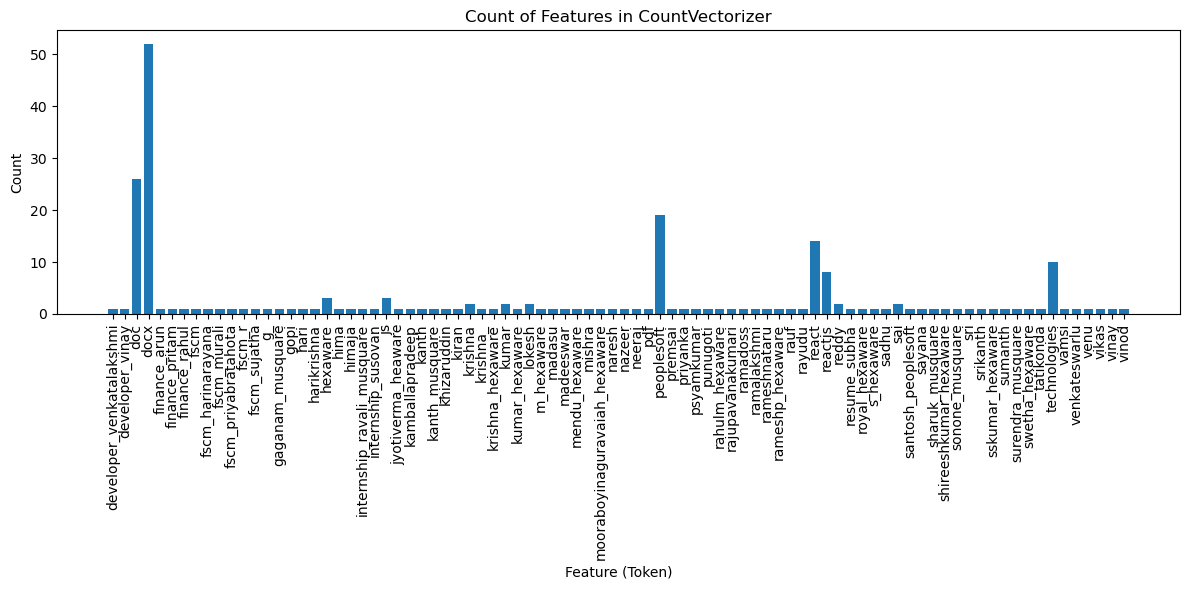

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Instantiate CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Resume'])

# Get the feature names (tokens) and their count
feature_names = vectorizer.get_feature_names_out()[50:150]
feature_counts = X.toarray()[:, 50:150].sum(axis=0)

# Create a bar plot for feature counts
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_counts)
plt.xticks(rotation=90)
plt.xlabel('Feature (Token)')
plt.ylabel('Count')
plt.title('Count of Features in CountVectorizer')
plt.tight_layout()
plt.show()


## **TFidf vectorizer**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 110)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df['Resume'])
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['_musquare' 'converted' 'converted docx' 'dev_krishna' 'developer_m'
 'developer_m lokesh' 'doc' 'docx' 'hexaware' 'hexaware docx' 'js'
 'krishna' 'kumar' 'kumar doc' 'kumar docx' 'kumar_hexaware'
 'kumar_hexaware docx' 'lokesh' 'lokesh babu_musquare'
 'lokesh babu_musquare technologies' 'lokesh docx' 'm_hexaware'
 'm_hexaware doc' 'madasu' 'madasu converted' 'madasu converted docx'
 'madeeswar' 'madeeswar a_hexaware' 'madeeswar a_hexaware doc'
 'mendu_hexaware' 'mendu_hexaware doc' 'mishra' 'mishra docx'
 'mooraboyinaguravaiah_hexaware' 'mooraboyinaguravaiah_hexaware docx'
 'naresh' 'naresh babu' 'naresh babu cherukuri_hexaware' 'nazeer'
 'nazeer basha' 'neeraj mishra docx' 'pdf' 'peoplesoft'
 'peoplesoft admin_anubhavsingh' 'peoplesoft admin_anubhavsingh docx'
 'peoplesoft admin_g' 'peoplesoft admin_g ananda'
 'peoplesoft admin_gangareddy' 'peoplesoft admin_gangareddy doc'
 'peoplesoft admin_murali' 'peoplesoft admin_murali docx'
 'peoplesoft admin_priyanka' 'peoplesoft admin_priyan

###**Named Entity Recognition (NER)**

In [47]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Apply NER on the resume_paragraph
doc = nlp(resume_paragraph)

# Iterate over the entities and print them
for entity in doc.ents:
    print(entity.text, entity.label_)

Peoplesoft PERSON
Peoplesoft ORG
Ananda Rayudu.doc PERSON
Peoplesoft ORG
Peoplesoft PERSON
Peoplesoft ORG
Ramadoss.doc ORG
Peoplesoft PERSON
Peoplesoft PERSON
Peoplesoft PERSON
Peoplesoft ORG
Akkala.doc ORG
PeopleSoft ORG
Alladi.doc ORG
PeopleSoft ORG
DBA_Vivekanand Sayana.docx PERSON
Peoplesoft Finance_Arun ORG
Peoplesoft ORG
Biswas.doc ORG
Peoplesoft ORG
Ahuja.doc ORG
Peoplesoft ORG
FSCM_HariNarayana.docx PRODUCT
Peoplesoft ORG
Peoplesoft ORG
Peoplesoft ORG
FSCM_R NORP
Ahmed.doc ORG
Peoplesoft PERSON
Reddy.doc ORG
React JS Developer_KotaniDurgaprasad ORG
React JS ORG
Reactjs Developer_kambala PERSON
Developer_M Lokesh PERSON
Developer_M Lokesh.docx
 PERSON
Musquare PERSON
Anil kumar.docx PERSON
Buddha Vamsi.docx
kamballapradeep.docx
Nazeer Basha.doc PERSON
Neeraj ORG
Rajupavanakumari PERSON
Tatikonda Kiran Kumar.doc
 PERSON
Vinod ORG
Hari Krishna M_Hexaware.doc PERSON
Harikrishna LOC
Hima NORP
Himaja G_(Hexaware).docx PERSON
J. Sumanth LOC
Jyotiverma_Heaware.docx
Madeeswar A_Hexaware

In [48]:
word_freq = {}
for word in resume_paragraph.split():
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
for word, freq in sorted_word_freq:
    print(word, freq)

Peoplesoft 17
React 14
Technologies.docx 8
Reactjs 8
].docx 4
JS 3
PeopleSoft 2
Dev_Krishna 2
()-converted.docx 2
Developer_M 2
Krishna 2
Admin_AnubhavSingh.docx 1
Admin_G 1
Ananda 1
Rayudu.doc 1
Admin_Gangareddy.doc 1
Admin_Murali.docx 1
Admin_Priyanka 1
Ramadoss.doc 1
Admin_SirazuddinMohammad.docx 1
Admin_srinivasarao.doc 1
Admin_Varkala 1
Vikas.docx 1
Admin_Vinod 1
Akkala.doc 1
DBA_Ganesh 1
Alladi.doc 1
DBA_Vivekanand 1
Sayana.docx 1
Finance_Arun 1
Venu.doc 1
Finance_Pritam 1
Biswas.doc 1
Finance_Rahul 1
Ahuja.doc 1
FSCM_HariNarayana.docx 1
FSCM_Murali.docx 1
FSCM_PriyabrataHota.docx 1
FSCM_R 1
Ahmed.doc 1
FSCM_SUJATHA.docx 1
Resume_Subha 1
Santosh_Peoplesoft 1
FSCM.docx 1
Internship_Ravali_Musquare 1
Technologies 1
().docx 1
Internship_Susovan 1
Bag_Musquare 1
Developer_Deepakreddy.docx 1
Developer_Haripriya.docx 1
Developer_Kamalakar 1
Reddy.docx 1
Developer_Naveen 1
sadhu.docx 1
Developer_PavasGoswami.doc 1
Developer_Pragnya.docx 1
Developer_Sarala 1
Madasu-converted.docx 1
Devel

###**Bar-Plot For Top 15 Words**

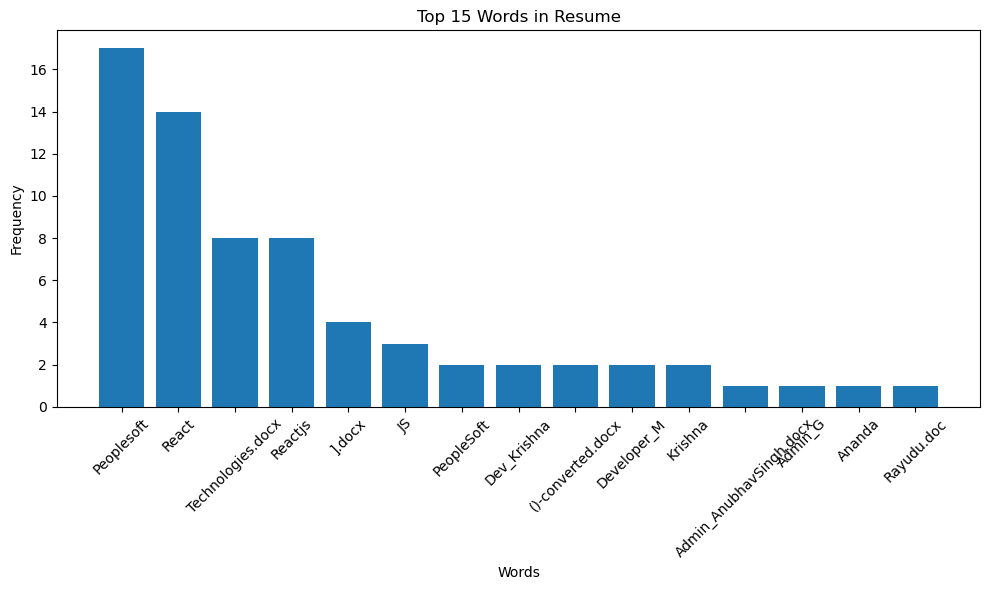

In [49]:
top_words = sorted_word_freq[:15]  # Select the top 20 words
words, frequencies = zip(*top_words)  # Unpack the word-frequency pairs
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(words, frequencies)  # Create the bar plot
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words in Resume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the spacing
plt.show()  # Display the plot

###**Word-Cloud For top 27 Words**

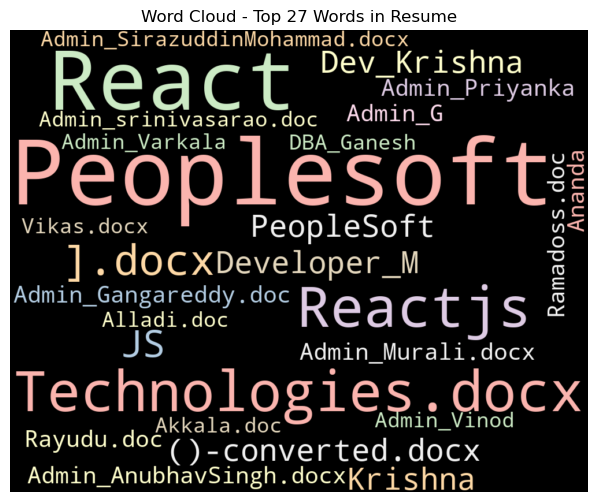

In [50]:
top_words = dict(sorted_word_freq[:27])  # Select the top 27 words as a dictionary
wordcloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                      colormap="Pastel1", collocations=False).generate_from_frequencies(top_words)
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud - Top 27 Words in Resume')
plt.show()  # Display the word cloud

In [51]:
Profile = np.sort(df['Profile'].unique())
Profile

array(['Peoplesoft', 'R_developer', 'SQL_Developer', 'Workday'],
      dtype=object)

In [52]:
df_profile = [df[df['Profile'] == profile].loc[:, ['Resume', 'Profile']] for profile in profile]
df_profile

[                                       Resume     Profile
 0          Peoplesoft Admin_AnubhavSingh.docx  Peoplesoft
 1        Peoplesoft Admin_G Ananda Rayudu.doc  Peoplesoft
 2             Peoplesoft Admin_Gangareddy.doc  Peoplesoft
 3                Peoplesoft Admin_Murali.docx  Peoplesoft
 4      Peoplesoft Admin_Priyanka Ramadoss.doc  Peoplesoft
 5    Peoplesoft Admin_SirazuddinMohammad.docx  Peoplesoft
 6           Peoplesoft Admin_srinivasarao.doc  Peoplesoft
 7         Peoplesoft Admin_Varkala Vikas.docx  Peoplesoft
 8           Peoplesoft Admin_Vinod Akkala.doc  Peoplesoft
 9            PeopleSoft DBA_Ganesh Alladi.doc  Peoplesoft
 10      PeopleSoft DBA_Vivekanand Sayana.docx  Peoplesoft
 11           Peoplesoft Finance_Arun Venu.doc  Peoplesoft
 12       Peoplesoft Finance_Pritam Biswas.doc  Peoplesoft
 13         Peoplesoft Finance_Rahul Ahuja.doc  Peoplesoft
 14          Peoplesoft FSCM_HariNarayana.docx  Peoplesoft
 15                Peoplesoft FSCM_Murali.docx  Peopleso

# Model Building and Evaluation

In [53]:
df.Profile.value_counts()

R_developer      24
Workday          21
Peoplesoft       20
SQL_Developer    14
Name: Profile, dtype: int64

In [54]:
df

,Resume,Profile
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft
1,Peoplesoft Admin_G Ananda Rayudu.doc,Peoplesoft
2,Peoplesoft Admin_Gangareddy.doc,Peoplesoft
3,Peoplesoft Admin_Murali.docx,Peoplesoft
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Peoplesoft
...,...,...
74,Sri Krishna S_Hexaware.doc,Workday
75,Srikanth-Hexaware.docx,Workday
76,SSKumar_Hexaware.docx,Workday
77,Venkateswarlu B_Hexaware.doc,Workday


###**Chi-Square Test**

**Null Hypothesis (H0):** There is no significant association between the content of the resume and the job profile.

**Alternative Hypothesis (H1):** There is a significant association between the content of the resume and the job profile.

In [55]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your DataFrame is called DF
resume_column = df["Resume"]
profile_column = df["Profile"]

# Create a contingency table
contingency_table = pd.crosstab(resume_column, profile_column)

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 236.99999999999997
p-value: 0.4329466780583608


**Alternative hypothesis suggests that there is a meaningful relationship between the content of the resume and the job profile**

###**Mutual information**

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif

# Assuming your DataFrame is called DF
resume_column = df["Resume"]
profile_column = df["Profile"]

# Create and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1, 3), max_features=110)
tfidf_matrix = vectorizer.fit_transform(resume_column)

# Calculate the mutual information
mutual_info_scores = mutual_info_classif(tfidf_matrix, profile_column)

# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to display the results
results = pd.DataFrame({"Feature": feature_names, "Mutual Information Score": mutual_info_scores})

# Print the results
print(results)


                        Feature  Mutual Information Score
0                     _musquare                  0.015268
1                     converted                  0.046991
2                converted docx                  0.046991
3                   dev_krishna                  0.030924
4                   developer_m                  0.030924
..                          ...                       ...
105  reactjs developer_m lokesh                  0.030924
106                       reddy                  0.030924
107                         sai                  0.032103
108                technologies                  0.173501
109           technologies docx                  0.153660

[110 rows x 2 columns]


**1)0.015268, suggesting it has relatively low information content regarding the "Profile" column**

**2)0.046991, indicating they provide slightly more information about the job profiles**

**3)0.173501, indicating it is a significant feature that carries valuable information for classifying the job profiles based on the resumes**

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, profile_column, test_size=0.2, random_state=44)
X_train.shape, X_test.shape

((63, 110), (16, 110))

###**Naive Bayes**

In [58]:
# Create and train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Predict the job profiles for the test set
ny_pred = naive_bayes.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ny_pred))


               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
  R_developer       0.67      1.00      0.80         6
SQL_Developer       0.00      0.00      0.00         4
      Workday       0.60      0.75      0.67         4

     accuracy                           0.69        16
    macro avg       0.57      0.69      0.62        16
 weighted avg       0.53      0.69      0.59        16



###**Support Vector Machines (SVM)**

In [59]:
# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict the job profiles for the test set
svy_pred = svm.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, svy_pred))

               precision    recall  f1-score   support

   Peoplesoft       0.40      1.00      0.57         2
  R_developer       1.00      1.00      1.00         6
SQL_Developer       0.00      0.00      0.00         4
      Workday       0.60      0.75      0.67         4

     accuracy                           0.69        16
    macro avg       0.50      0.69      0.56        16
 weighted avg       0.57      0.69      0.61        16



###**Logistic Regression**

In [60]:
# Create and train the Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict the job profiles for the test set
ly_pred = logistic_regression.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ly_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
  R_developer       1.00      1.00      1.00         6
SQL_Developer       1.00      0.25      0.40         4
      Workday       0.57      1.00      0.73         4

     accuracy                           0.81        16
    macro avg       0.89      0.81      0.78        16
 weighted avg       0.89      0.81      0.78        16



###**Random Forest**

In [61]:
# Create and train the Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict the job profiles for the test set
ry_pred = random_forest.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ry_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
  R_developer       1.00      1.00      1.00         6
SQL_Developer       1.00      0.25      0.40         4
      Workday       0.57      1.00      0.73         4

     accuracy                           0.81        16
    macro avg       0.89      0.81      0.78        16
 weighted avg       0.89      0.81      0.78        16



###**Gradient Boosting Model**

In [62]:
# Create and train the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Predict the job profiles for the test set
gby_pred = gradient_boosting.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, gby_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
  R_developer       1.00      1.00      1.00         6
SQL_Developer       1.00      0.25      0.40         4
      Workday       0.57      1.00      0.73         4

     accuracy                           0.81        16
    macro avg       0.89      0.81      0.78        16
 weighted avg       0.89      0.81      0.78        16



###**AdaBoost model**

In [63]:
# Create and train the AdaBoost classifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

# Predict the job profiles for the test set
ady_pred = adaboost.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ady_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
  R_developer       0.55      1.00      0.71         6
SQL_Developer       0.00      0.00      0.00         4
      Workday       0.33      0.25      0.29         4

     accuracy                           0.56        16
    macro avg       0.47      0.56      0.50        16
 weighted avg       0.41      0.56      0.46        16



###**Bagging Classifier**

In [64]:
# Create and train the Bagging classifier
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

# Predict the job profiles for the test set
by_pred = bagging.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, by_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
  R_developer       1.00      1.00      1.00         6
SQL_Developer       0.50      0.50      0.50         4
      Workday       0.50      0.50      0.50         4

     accuracy                           0.75        16
    macro avg       0.75      0.75      0.75        16
 weighted avg       0.75      0.75      0.75        16



###**Decision Tree Classifier**

In [65]:
# Create and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict the job profiles for the test set
dy_pred = decision_tree.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, dy_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         2
  R_developer       1.00      0.83      0.91         6
SQL_Developer       0.67      0.50      0.57         4
      Workday       0.50      0.75      0.60         4

     accuracy                           0.75        16
    macro avg       0.79      0.77      0.77        16
 weighted avg       0.79      0.75      0.76        16



###**KNN Classifier**

In [66]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict the job profiles for the test set
ky_pred = knn.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ky_pred))

               precision    recall  f1-score   support

   Peoplesoft       0.00      0.00      0.00         2
  R_developer       1.00      1.00      1.00         6
SQL_Developer       0.57      1.00      0.73         4
      Workday       0.67      0.50      0.57         4

     accuracy                           0.75        16
    macro avg       0.56      0.62      0.57        16
 weighted avg       0.68      0.75      0.70        16



In [67]:
# Initialize lists to store evaluation metrics
classifiers = ["Naive Bayes", "Support Vector Machine", "Logistic Regression", "Random Forest", "Gradient Boosting", "AdaBoost", "Bagging Classifier", "Decision Tree", "KNN Classifier"]
precision_scores = []
recall_scores = []
f1_scores = []

# Evaluate each classifier and store the evaluation metrics
for classifier, y_pred in zip(classifiers, [ny_pred,svy_pred,ly_pred,ry_pred,gby_pred,ady_pred,by_pred,dy_pred,ky_pred]):
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'] * 100)
    recall_scores.append(report['weighted avg']['recall'] * 100)
    f1_scores.append(report['weighted avg']['f1-score'] * 100)

# Create a DataFrame to store the evaluation metrics
evaluation_table = pd.DataFrame({
    "Classifier": classifiers,
    "Precision(%)": precision_scores,
    "Recall(%)": recall_scores,
    "F1-Score(%)": f1_scores
})

# Display the evaluation table
print(evaluation_table)


               Classifier  Precision(%)  Recall(%)  F1-Score(%)
0             Naive Bayes     52.500000      68.75    59.166667
1  Support Vector Machine     57.500000      68.75    61.309524
2     Logistic Regression     89.285714      81.25    78.181818
3           Random Forest     89.285714      81.25    78.181818
4       Gradient Boosting     89.285714      81.25    78.181818
5                AdaBoost     41.287879      56.25    46.113445
6      Bagging Classifier     75.000000      75.00    75.000000
7           Decision Tree     79.166667      75.00    75.876623
8          KNN Classifier     68.452381      75.00    69.967532


###**Model Visualization**

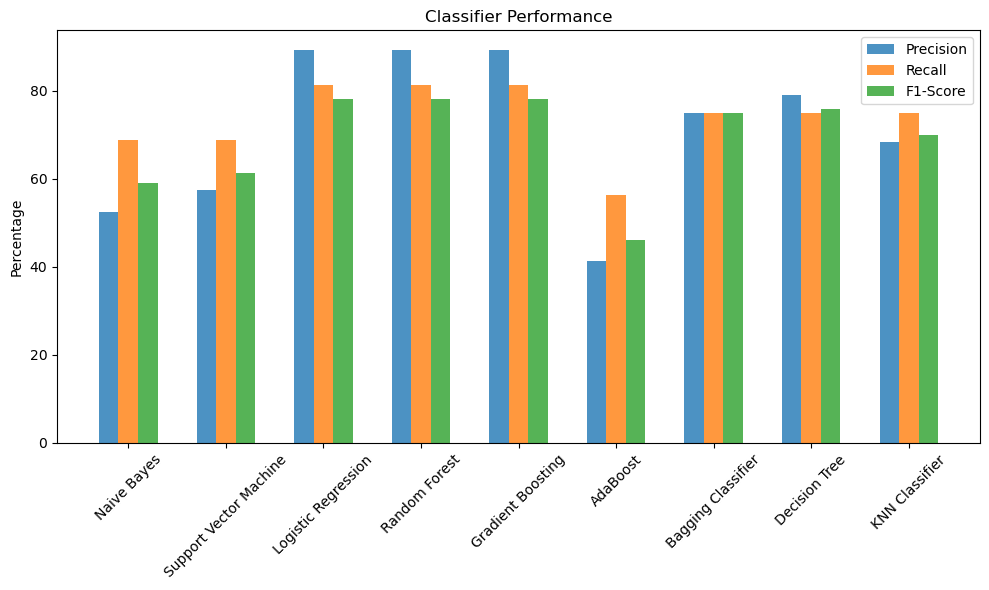

In [68]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the positions and width for the bars
pos = list(range(len(evaluation_table)))
width = 0.2

# Plot the precision, recall, and F1-score as grouped bars
plt.bar(pos, evaluation_table['Precision(%)'], width, alpha=0.8, label='Precision')
plt.bar([p + width for p in pos], evaluation_table['Recall(%)'], width, alpha=0.8, label='Recall')
plt.bar([p + 2 * width for p in pos], evaluation_table['F1-Score(%)'], width, alpha=0.8, label='F1-Score')

# Set the x-axis labels and tick positions
plt.xticks([p + width for p in pos], evaluation_table['Classifier'], rotation=45)

# Set the y-axis label
plt.ylabel('Percentage')

# Set the chart title
plt.title('Classifier Performance')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

### Final Model

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
model_GB = GradientBoostingClassifier()

In [71]:
model_GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [72]:
base_pred = model_GB.predict(X_test)
base_pred

array(['Workday', 'SQL_Developer', 'R_developer', 'Workday',
       'R_developer', 'Workday', 'R_developer', 'Workday', 'Workday',
       'Workday', 'R_developer', 'Peoplesoft', 'R_developer',
       'R_developer', 'Peoplesoft', 'Workday'], dtype=object)

### Model Deployment

In [73]:
import pickle

In [74]:
filename = 'model_GB.pkl'
pickle.dump(model_GB,open(filename,'wb'))

In [75]:
import pickle
filename = 'vector.pkl'
pickle.dump(vectorizer_n_gram_max_features,open(filename,'wb'))